In [5]:
import requests
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from fredapi import Fred

api_key = 'c4ffa2758f6c43d61a16594bbf7a1147'

SP500 Index data

In [2]:
series_id = 'SP500'
url = f'https://api.stlouisfed.org/fred/series/observations?series_id={series_id}&api_key={api_key}&file_type=json'

# Fetch data from FRED API
response = requests.get(url)
data = response.json()

# Convert data to a DataFrame
df = pd.DataFrame(data['observations'])

# Convert date to datetime format and value to numeric
df['date'] = pd.to_datetime(df['date'])
df['value'] = pd.to_numeric(df['value'], errors='coerce')

# Save to CSV for later use or further analysis
df.to_csv("SP500_historical_data.csv", index=False)

print("S&P 500 data downloaded and saved successfully!")

S&P 500 data downloaded and saved successfully!


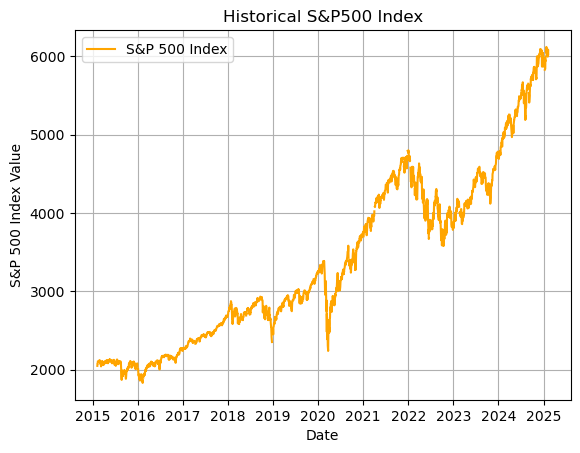

In [3]:
df = pd.read_csv("SP500_historical_data.csv")  # Replace with Yahoo Finance CSV if needed
df['date'] = pd.to_datetime(df['date'])  # Ensure date is in datetime format

# Plotting the S&P 500 Index
plt.plot(df['date'], df['value'], color='orange', label='S&P 500 Index')  # Use 'Close' for Yahoo Finance data
plt.title("Historical S&P500 Index")
plt.xlabel("Date")
plt.ylabel("S&P 500 Index Value")
plt.legend()
plt.grid(True)
plt.show()

Download FRED announcement data, which includes key economic indicators and
their corresponding announcements.

In [18]:
fred=Fred(api_key=api_key)
gdp_data = fred.get_series("GDP")
cpi_data = fred.get_series("CPIAUCSL")
unemployment_data = fred.get_series("UNRATE") 
federal_data = fred.get_series("FEDFUNDS") #Federal Funds Rate
tenyear_data = fred.get_series("DGS10") #10 Year Yield data
print(federal_data.tail())

2024-09-01    5.13
2024-10-01    4.83
2024-11-01    4.64
2024-12-01    4.48
2025-01-01    4.33
dtype: float64


Training the model for calculating sentiment from the FRED announcements